In [1]:
import sys
import pandas as pd 
import sklearn
import scipy
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from datetime import datetime
from collections import Counter

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score

from imblearn.ensemble import BalancedRandomForestClassifier
from imblearn.metrics import classification_report_imbalanced
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTEENN
from imblearn.under_sampling import ClusterCentroids

In [2]:
cc_df=pd.read_csv("creditcard.csv")
print(cc_df.head())

   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28 

In [3]:
print(cc_df.describe())

                Time            V1            V2            V3            V4  \
count  284807.000000  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean    94813.859575  3.919560e-15  5.688174e-16 -8.769071e-15  2.782312e-15   
std     47488.145955  1.958696e+00  1.651309e+00  1.516255e+00  1.415869e+00   
min         0.000000 -5.640751e+01 -7.271573e+01 -4.832559e+01 -5.683171e+00   
25%     54201.500000 -9.203734e-01 -5.985499e-01 -8.903648e-01 -8.486401e-01   
50%     84692.000000  1.810880e-02  6.548556e-02  1.798463e-01 -1.984653e-02   
75%    139320.500000  1.315642e+00  8.037239e-01  1.027196e+00  7.433413e-01   
max    172792.000000  2.454930e+00  2.205773e+01  9.382558e+00  1.687534e+01   

                 V5            V6            V7            V8            V9  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean  -1.552563e-15  2.010663e-15 -1.694249e-15 -1.927028e-16 -3.137024e-15   
std    1.380247e+00  1.332271e+00  1.23709

Amount MAX: 25691.16
Amount MIN: 0.0
Amount MEAN: 88.34961925087359


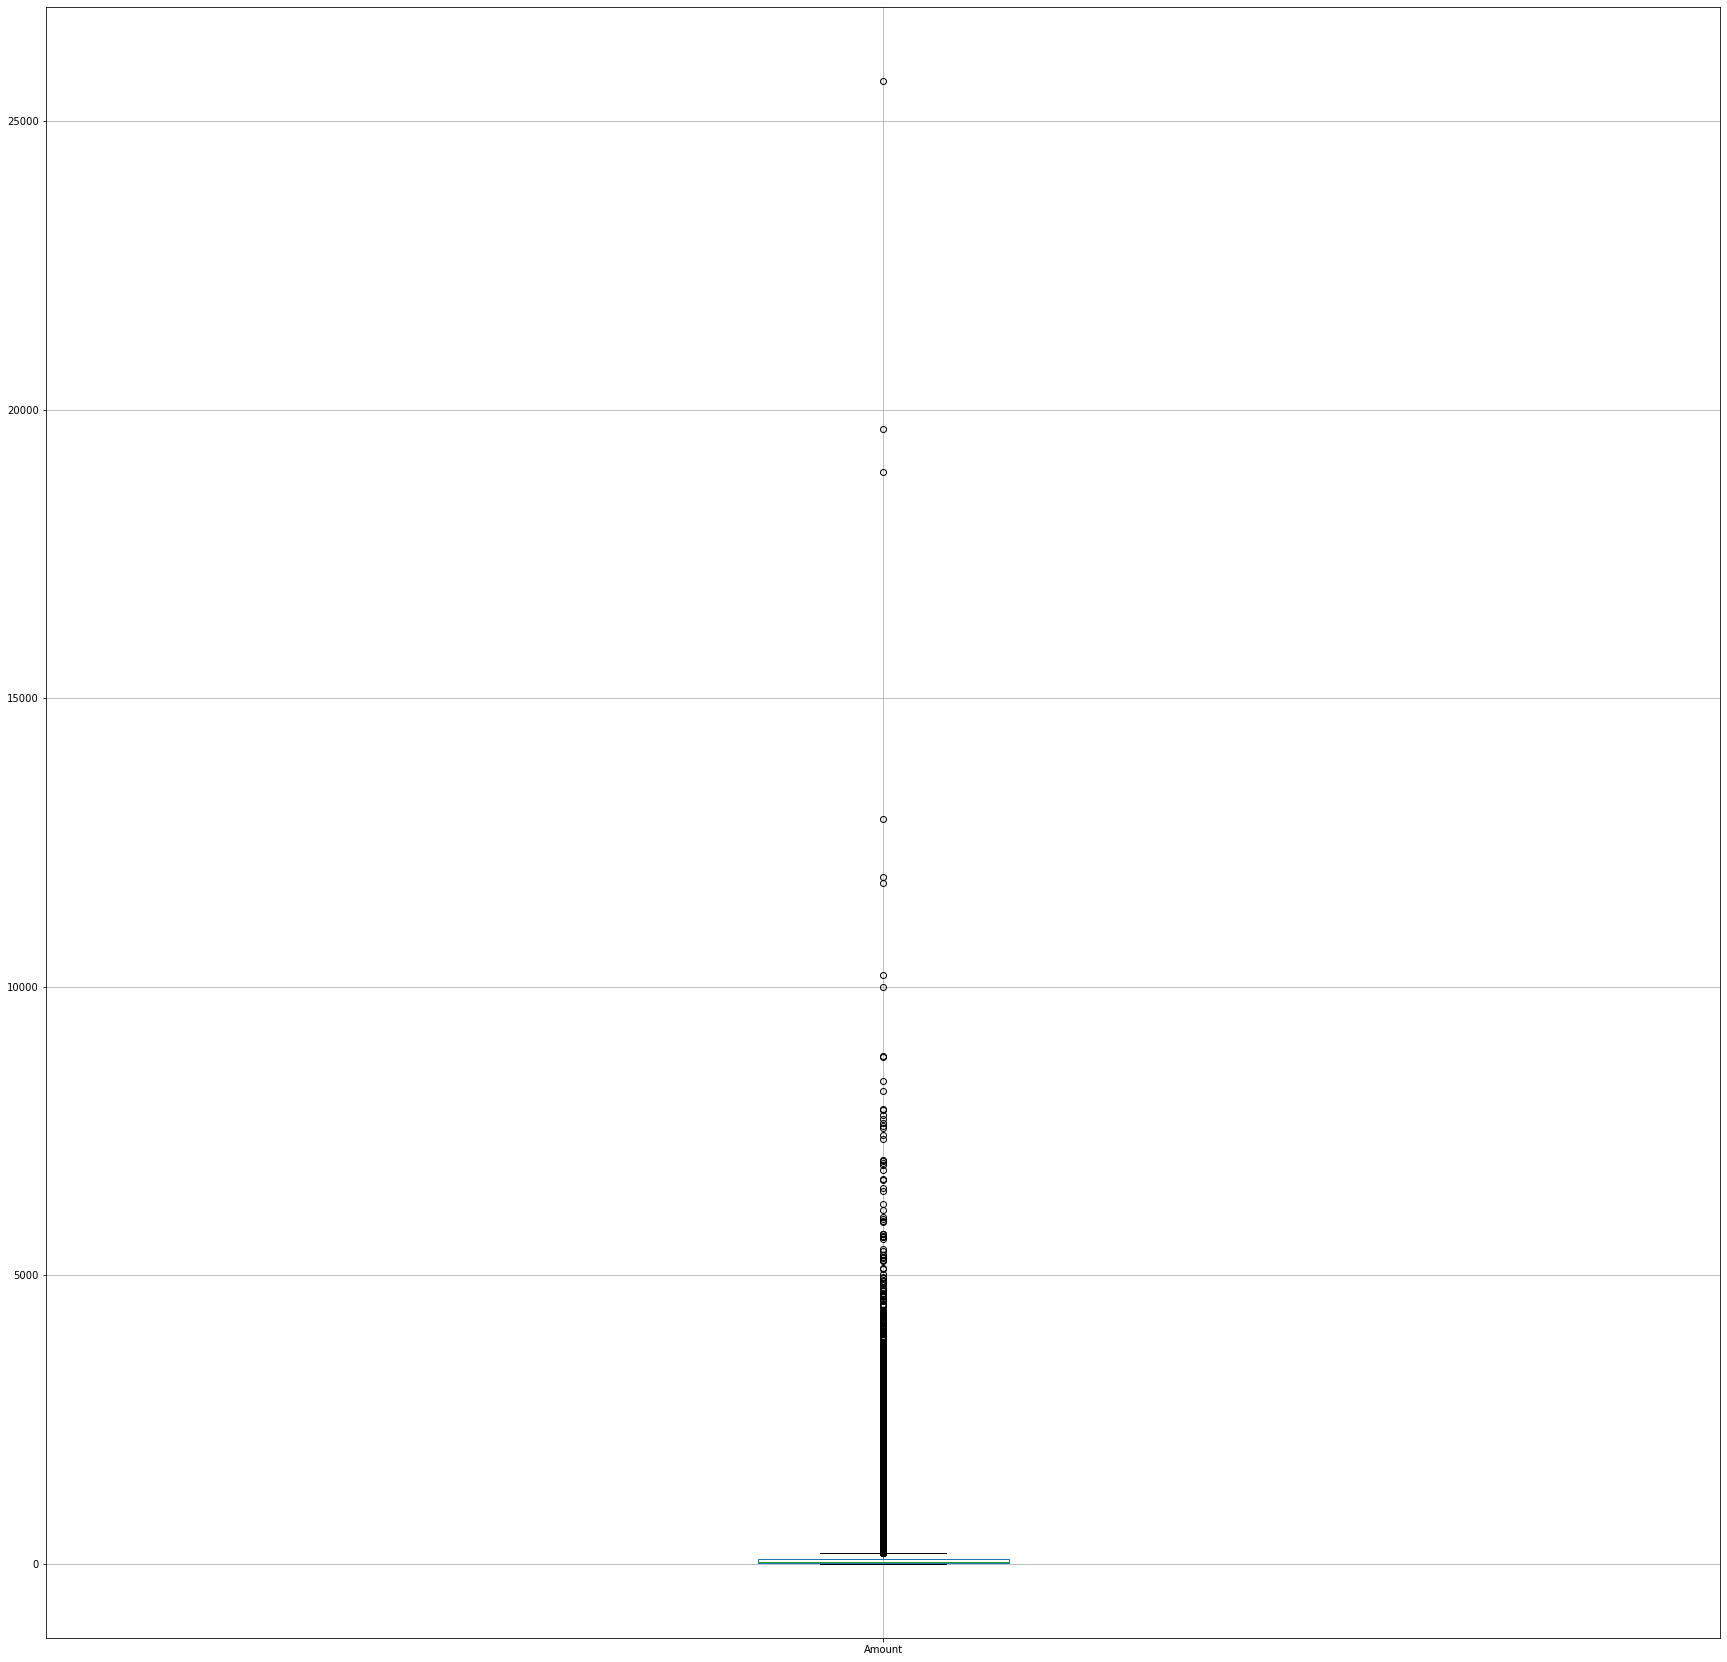

In [4]:
print("Amount MAX: "+str(cc_df['Amount'].max()))
print("Amount MIN: "+str(cc_df['Amount'].min()))
print("Amount MEAN: "+str(cc_df['Amount'].mean()))

tmp_frame=cc_df[['Amount']].copy()
amt_plot=tmp_frame.boxplot(figsize=(30,30))

Amount MAX: 2125.87
Amount MIN: 0.0
Amount MEAN: 122.21132113821133


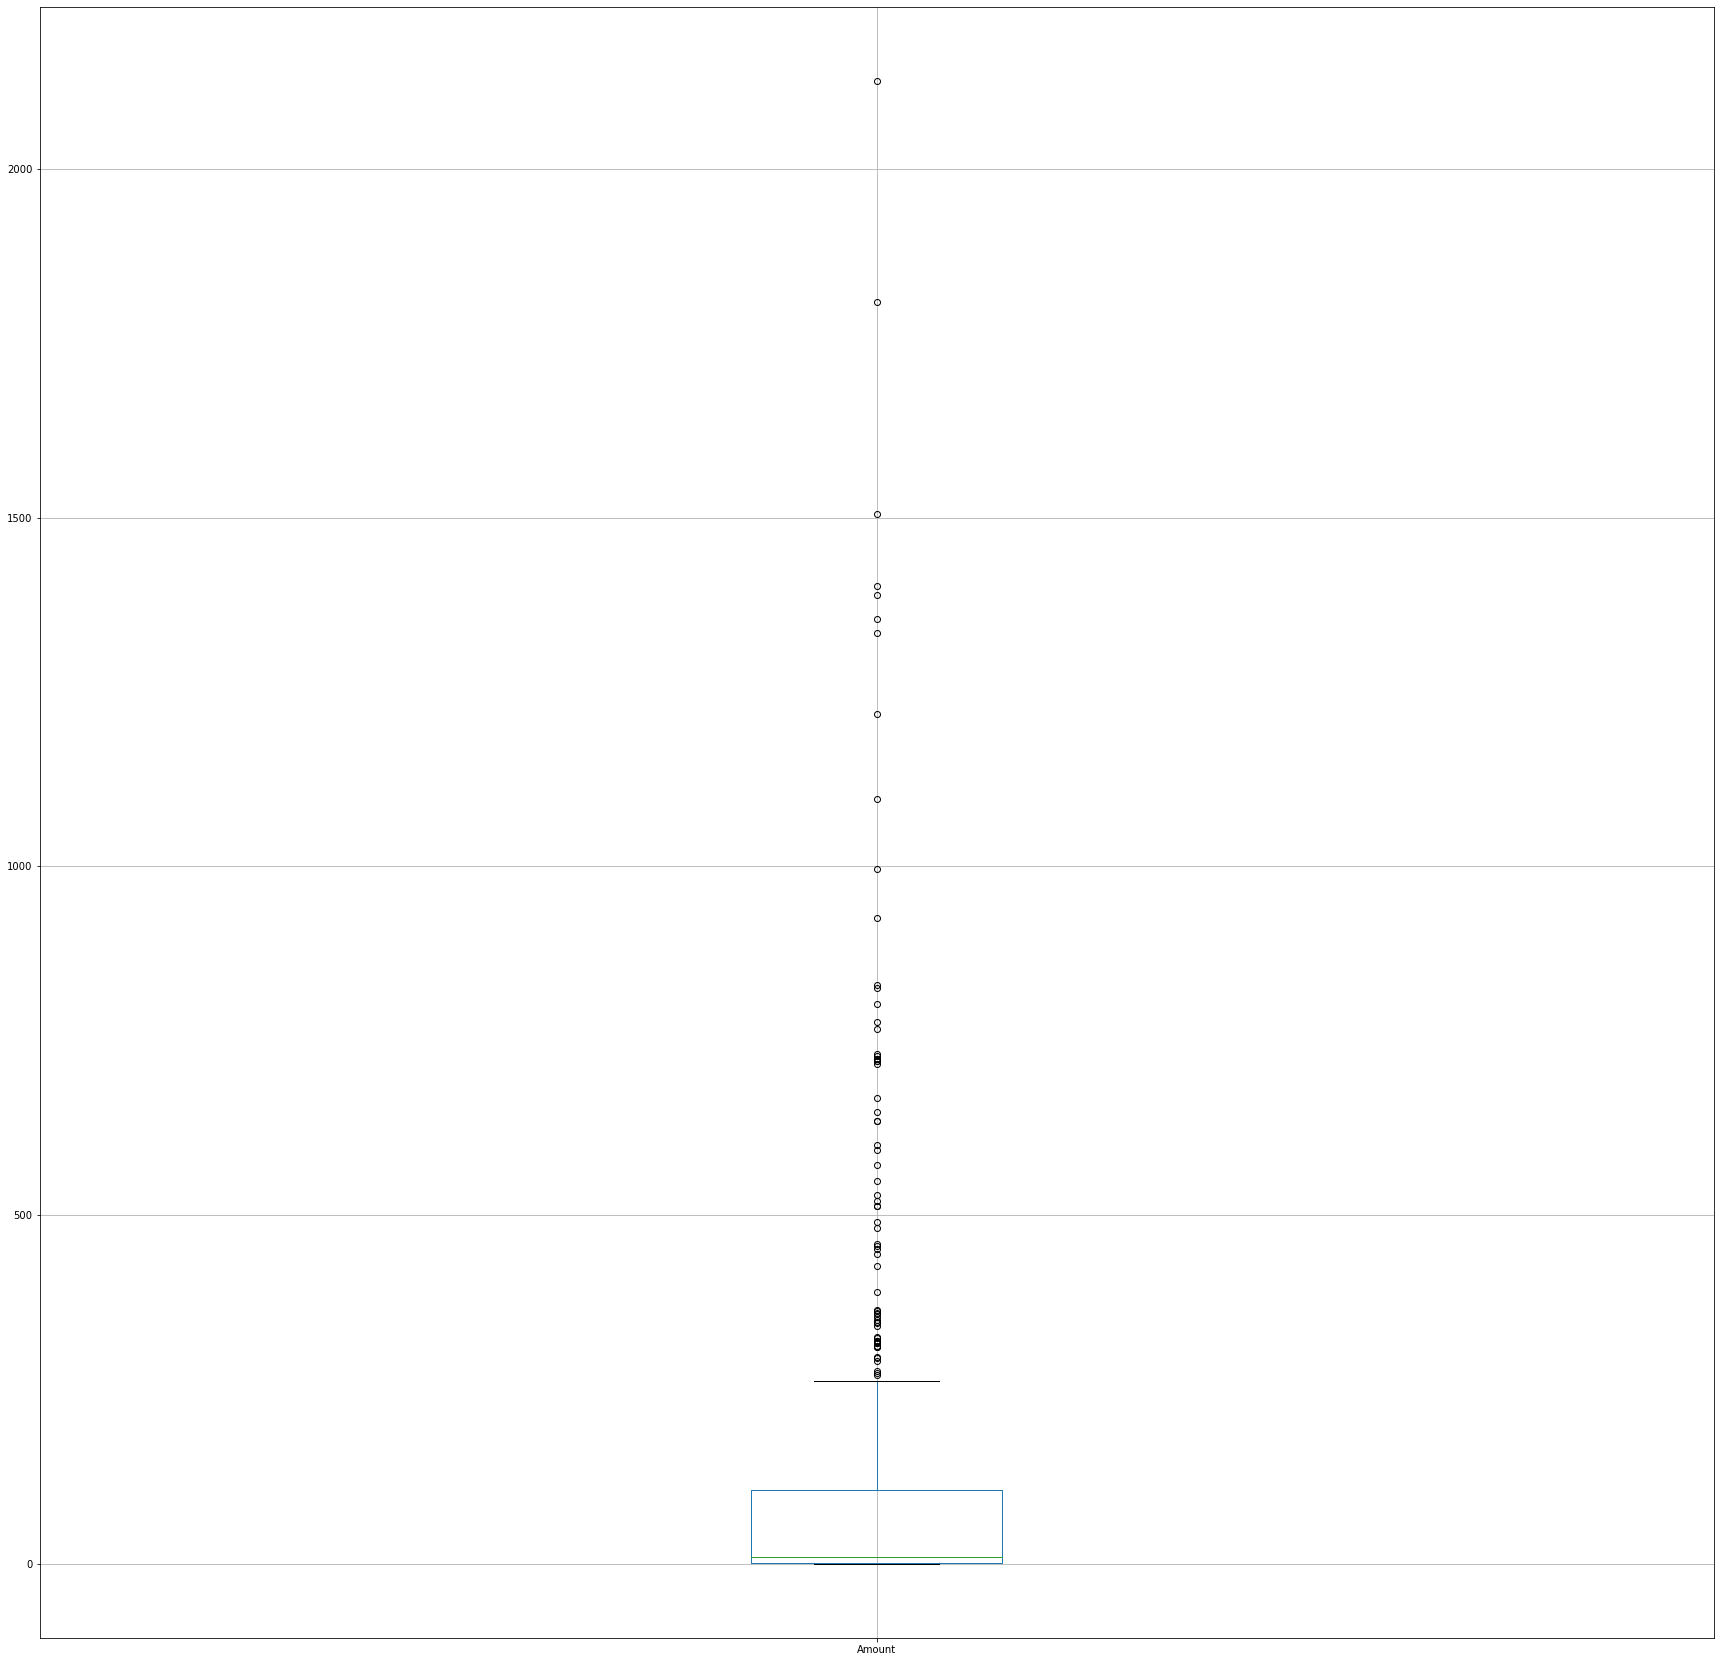

In [5]:
fraud_df=cc_df[cc_df['Class']==1]

print("Amount MAX: "+str(fraud_df['Amount'].max()))
print("Amount MIN: "+str(fraud_df['Amount'].min()))
print("Amount MEAN: "+str(fraud_df['Amount'].mean()))

tmp_frame=fraud_df[['Amount']].copy()
amt_plot=tmp_frame.boxplot(figsize=(30,30))

Amount MAX: 25691.16
Amount MIN: 0.0
Amount MEAN: 88.29102242225574


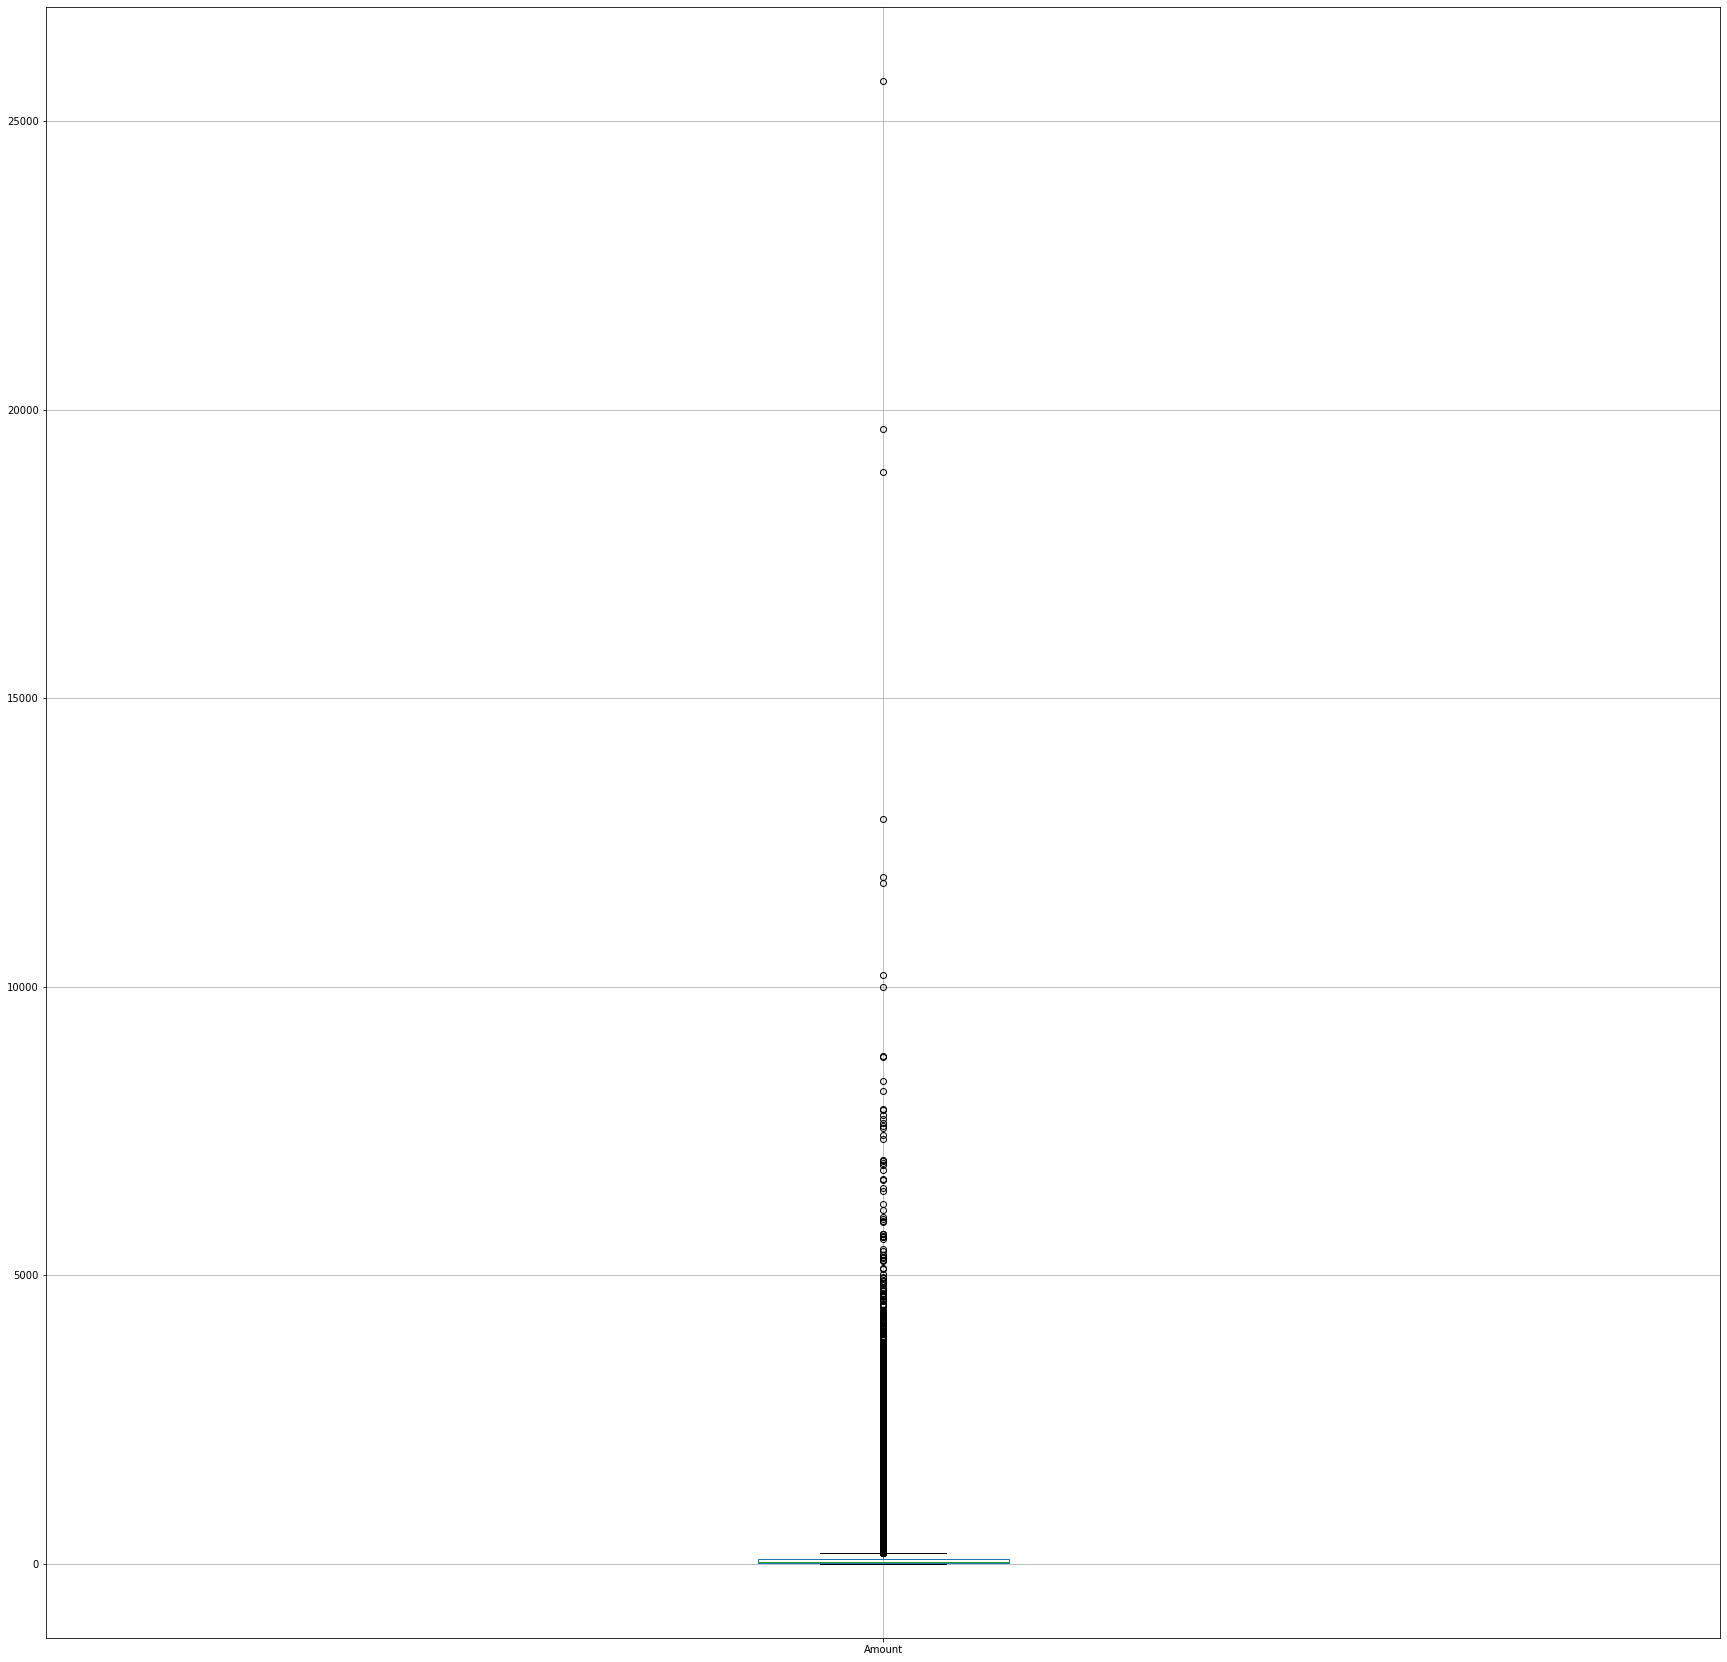

In [6]:
good_df=cc_df[cc_df['Class']==0]

print("Amount MAX: "+str(good_df['Amount'].max()))
print("Amount MIN: "+str(good_df['Amount'].min()))
print("Amount MEAN: "+str(good_df['Amount'].mean()))

tmp_frame=good_df[['Amount']].copy()
amt_plot=tmp_frame.boxplot(figsize=(30,30))

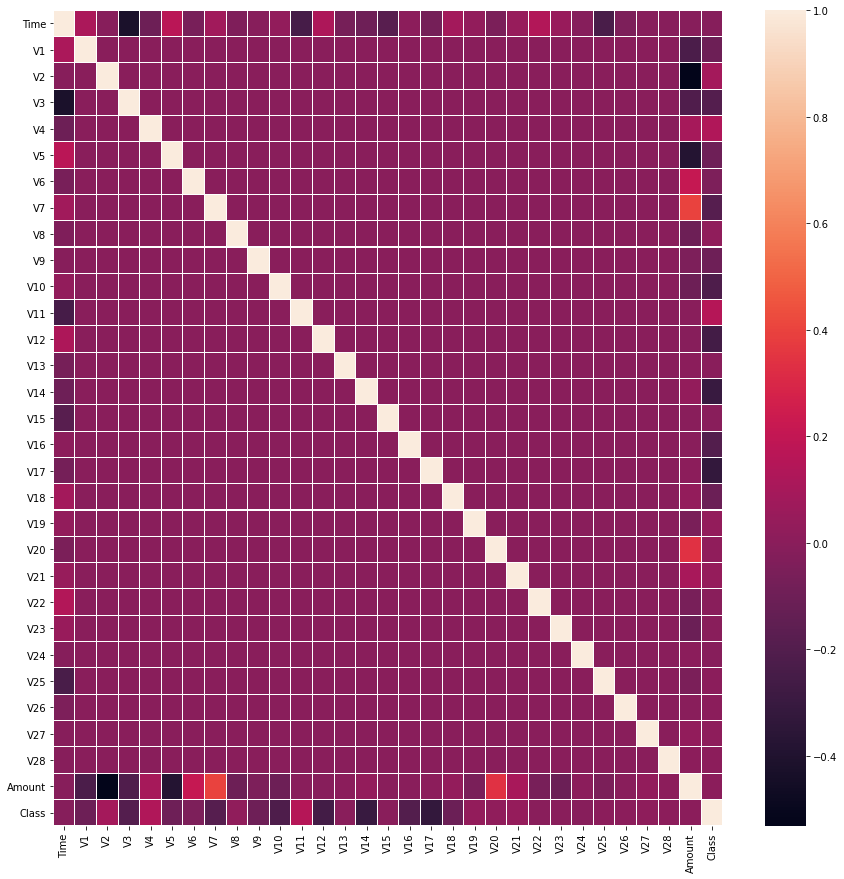

In [7]:
plt.figure(figsize=(15,15))
total_corr=cc_df.corr()
sns.heatmap(total_corr,xticklabels=total_corr.columns,yticklabels=total_corr.columns,linewidths=.1)
plt.show()

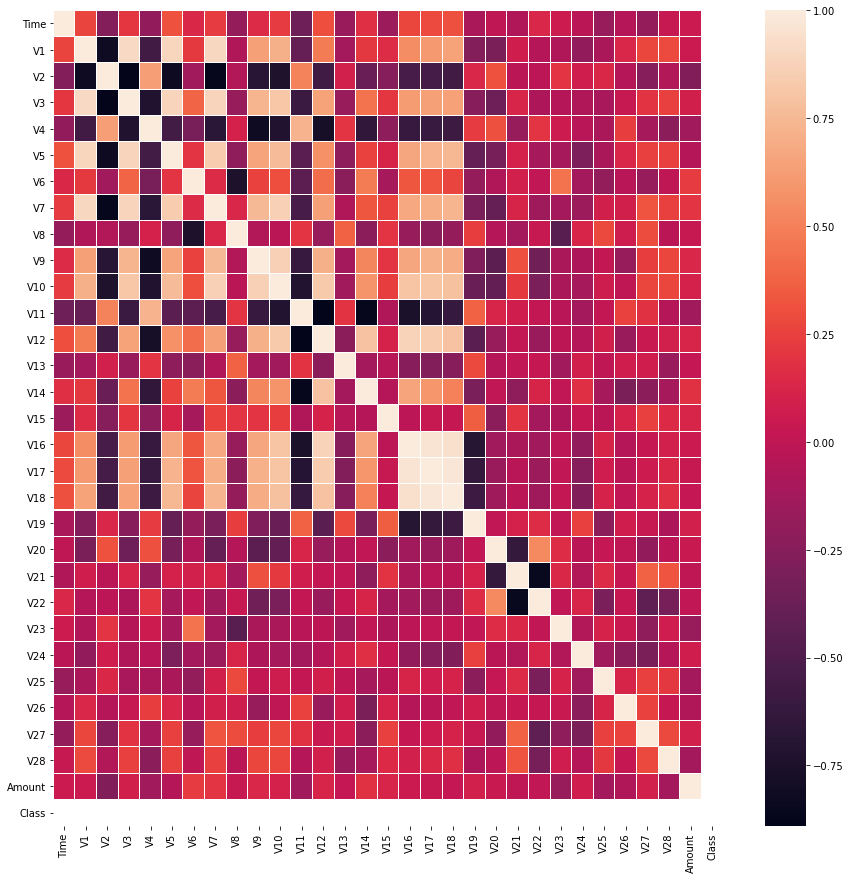

In [8]:
plt.figure(figsize=(15,15))
fraud_corr=fraud_df.corr()
sns.heatmap(fraud_corr,xticklabels=fraud_corr.columns,yticklabels=fraud_corr.columns,linewidths=.1)
plt.show()

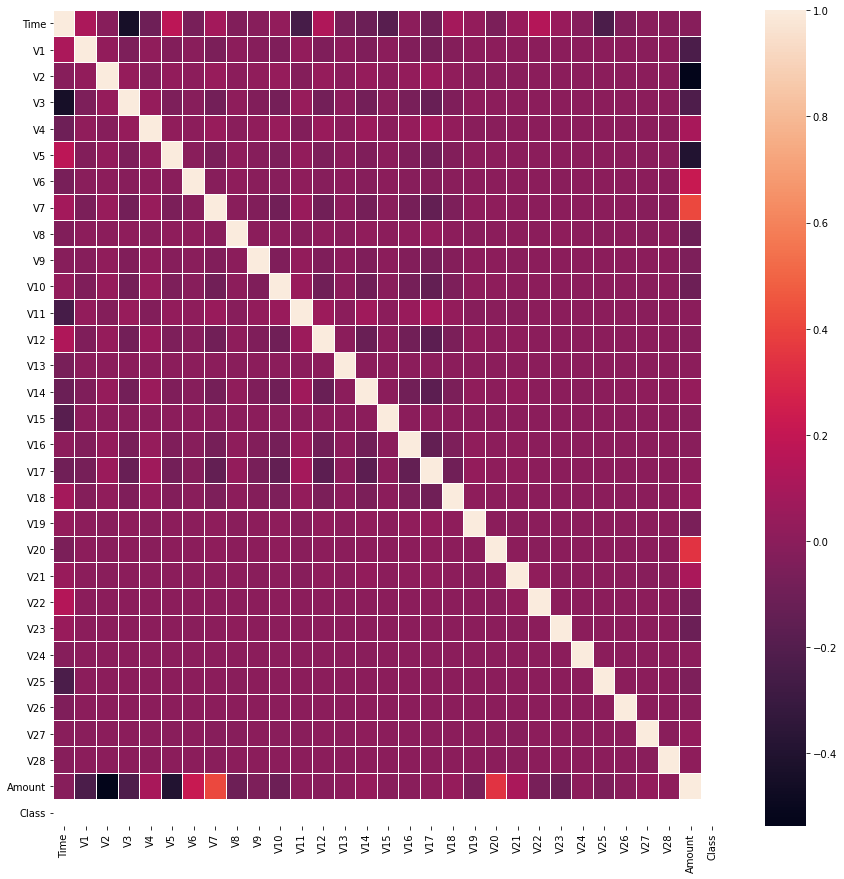

In [9]:
plt.figure(figsize=(15,15))
good_corr=good_df.corr()
sns.heatmap(good_corr,xticklabels=good_corr.columns,yticklabels=good_corr.columns,linewidths=.1)
plt.show()

In [10]:
# Split into Train / Test Sets
x=cc_df.drop(columns='Class',axis=1)
print(x)

y=cc_df[['Class']].copy()
print(y)

xtrain,xtest,ytrain,ytest=train_test_split(x,y,random_state=1)

            Time         V1         V2        V3        V4        V5  \
0            0.0  -1.359807  -0.072781  2.536347  1.378155 -0.338321   
1            0.0   1.191857   0.266151  0.166480  0.448154  0.060018   
2            1.0  -1.358354  -1.340163  1.773209  0.379780 -0.503198   
3            1.0  -0.966272  -0.185226  1.792993 -0.863291 -0.010309   
4            2.0  -1.158233   0.877737  1.548718  0.403034 -0.407193   
...          ...        ...        ...       ...       ...       ...   
284802  172786.0 -11.881118  10.071785 -9.834783 -2.066656 -5.364473   
284803  172787.0  -0.732789  -0.055080  2.035030 -0.738589  0.868229   
284804  172788.0   1.919565  -0.301254 -3.249640 -0.557828  2.630515   
284805  172788.0  -0.240440   0.530483  0.702510  0.689799 -0.377961   
284806  172792.0  -0.533413  -0.189733  0.703337 -0.506271 -0.012546   

              V6        V7        V8        V9  ...       V20       V21  \
0       0.462388  0.239599  0.098698  0.363787  ...  0.25141

In [11]:
# Oversampling (Smote) + Random Forest 
xsmote,ysmote=SMOTE(random_state=1,sampling_strategy=1.0).fit_resample(xtrain,ytrain)

print(xsmote)
print(ysmote)

                 Time         V1        V2         V3        V4        V5  \
0       159708.000000  -0.459482  1.198230   2.315423  4.274698  0.603004   
1       129139.000000   1.878563  0.020785  -1.621113  2.908813  2.507847   
2         4263.000000  -1.467414  1.210542   1.891733 -0.282189 -0.214526   
3       113041.000000   2.073474 -0.147624  -1.495803  0.184499  0.107505   
4        77352.000000   1.097497  0.357207   1.051187  2.631217 -0.464023   
...               ...        ...       ...        ...       ...       ...   
426443   41233.586829 -10.355998  6.092424 -13.081348  7.333507 -9.550066   
426444   35886.873089  -2.813944  3.771450  -3.775914  5.561832 -3.589699   
426445  143237.936649  -1.408302  2.508873  -2.686728  4.111950  0.516272   
426446  129738.321857  -1.581447  2.974258  -6.213306  3.656808 -0.810412   
426447  150719.013410  -0.261952  1.361121  -2.416682  3.613812  0.951105   

              V6         V7        V8        V9  ...       V20       V21  \

In [12]:
brf=BalancedRandomForestClassifier(n_estimators=100,random_state=1)
brf.fit(xsmote,ysmote.values.ravel())

BalancedRandomForestClassifier(random_state=1)

In [13]:
brf_pred=brf.predict(xtest)
print(classification_report_imbalanced(ytest,brf_pred))
print(accuracy_score(ytest,brf_pred))

                   pre       rec       spe        f1       geo       iba       sup

          0       1.00      1.00      0.78      1.00      0.89      0.80     71091
          1       0.85      0.78      1.00      0.82      0.89      0.77       111

avg / total       1.00      1.00      0.78      1.00      0.89      0.80     71202

0.9994522625768939


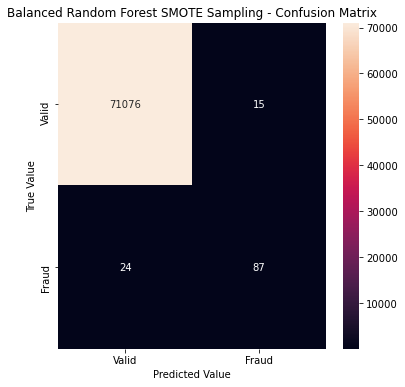

In [14]:
labels= ['Valid', 'Fraud'] 
conf_matrix=confusion_matrix(ytest,brf_pred) 
plt.figure(figsize=(6, 6)) 
sns.heatmap(conf_matrix, xticklabels= labels, yticklabels= labels, annot=True, fmt="d")
plt.title("Balanced Random Forest SMOTE Sampling - Confusion Matrix") 
plt.ylabel('True Value') 
plt.xlabel('Predicted Value') 
plt.show()

In [15]:
# Combination Sampling + Random Forest 
from imblearn.combine import SMOTEENN
smote_enn = SMOTEENN(random_state=0)
xsmtn,ysmtn=smote_enn.fit_resample(xtrain,ytrain)

In [16]:
brf=BalancedRandomForestClassifier(n_estimators=10,random_state=1)
brf.fit(xsmtn,ysmtn.values.ravel())

BalancedRandomForestClassifier(n_estimators=10, random_state=1)

In [17]:
brf_pred=brf.predict(xtest)
print(classification_report_imbalanced(ytest,brf_pred))
print(accuracy_score(ytest,brf_pred))

                   pre       rec       spe        f1       geo       iba       sup

          0       1.00      1.00      0.78      1.00      0.89      0.80     71091
          1       0.81      0.78      1.00      0.79      0.89      0.77       111

avg / total       1.00      1.00      0.78      1.00      0.89      0.80     71202

0.9993679952810315


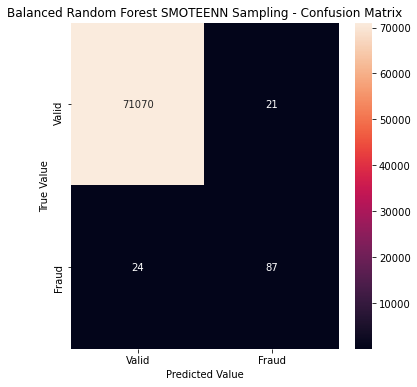

In [18]:
labels= ['Valid', 'Fraud'] 
conf_matrix=confusion_matrix(ytest,brf_pred) 
plt.figure(figsize=(6, 6)) 
sns.heatmap(conf_matrix, xticklabels= labels, yticklabels= labels, annot=True, fmt="d")
plt.title("Balanced Random Forest SMOTEENN Sampling - Confusion Matrix") 
plt.ylabel('True Value') 
plt.xlabel('Predicted Value') 
plt.show()

In [19]:
# Undersampling + Random Forest 
cc=ClusterCentroids(random_state=1)
xcc,ycc=cc.fit_resample(xtrain,ytrain)

In [20]:
brf.fit(xcc,ycc.values.ravel())

BalancedRandomForestClassifier(n_estimators=10, random_state=1)

In [22]:
brf_pred=brf.predict(xtest)
print(classification_report_imbalanced(ytest,brf_pred))
print(accuracy_score(ytest,brf_pred))

                   pre       rec       spe        f1       geo       iba       sup

          0       1.00      0.13      0.98      0.23      0.36      0.12     71091
          1       0.00      0.98      0.13      0.00      0.36      0.14       111

avg / total       1.00      0.13      0.98      0.23      0.36      0.12     71202

0.1340130895199573


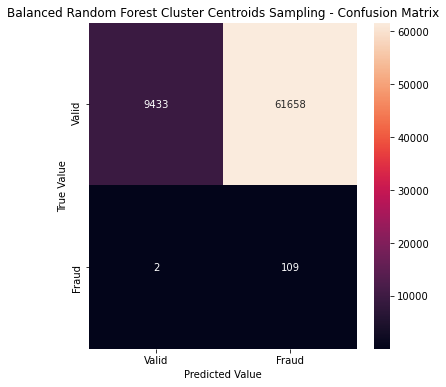

In [23]:
labels= ['Valid', 'Fraud'] 
conf_matrix=confusion_matrix(ytest,brf_pred) 
plt.figure(figsize=(6, 6)) 
sns.heatmap(conf_matrix, xticklabels= labels, yticklabels= labels, annot=True, fmt="d")
plt.title("Balanced Random Forest Cluster Centroids Sampling - Confusion Matrix") 
plt.ylabel('True Value') 
plt.xlabel('Predicted Value') 
plt.show()

In [24]:
# No sampling
brf.fit(xtrain,ytrain.values.ravel())
brf_pred=brf.predict(xtest)
print(classification_report_imbalanced(ytest,brf_pred))
print(accuracy_score(ytest,brf_pred))

                   pre       rec       spe        f1       geo       iba       sup

          0       1.00      0.98      0.86      0.99      0.92      0.85     71091
          1       0.06      0.86      0.98      0.11      0.92      0.83       111

avg / total       1.00      0.98      0.86      0.99      0.92      0.85     71202

0.9783011713154125


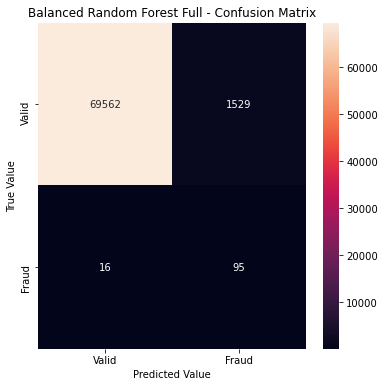

In [25]:
labels= ['Valid', 'Fraud'] 
conf_matrix=confusion_matrix(ytest,brf_pred) 
plt.figure(figsize=(6, 6)) 
sns.heatmap(conf_matrix, xticklabels= labels, yticklabels= labels, annot=True, fmt="d")
plt.title("Balanced Random Forest Full - Confusion Matrix") 
plt.ylabel('True Value') 
plt.xlabel('Predicted Value') 
plt.show()